# Example Load and Plot

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import ecco_v4_py as ecco
import cartopy.feature as cf
import cartopy.crs as ccrs

In [2]:
ds = xr.open_dataset('~/jupyter-notebooks/datasets/noras_story.nc')

In [3]:
plt.rcParams.update({'font.size':16})

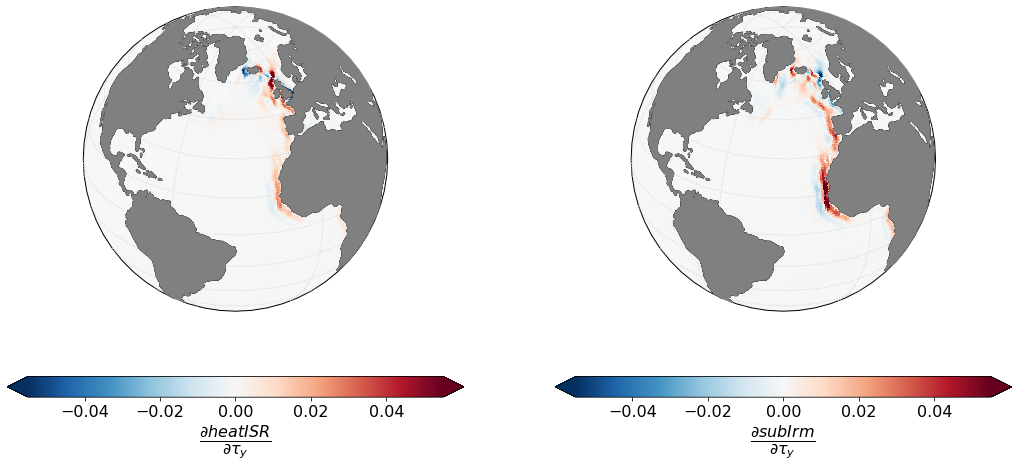

In [4]:
fig = plt.figure(figsize=(18,8))
vmax = .055
fig,ax0,p0,cbar0,*_=ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,
                                               ds['adxx_tauv_heatISR'],
                                               show_colorbar=False,
                                               projection_type='ortho',
                                               user_lat_0=30,
                                               user_lon_0=-35,
                                               cmin=-vmax,cmax=vmax,
                                               show_grid_lines=False,
                                               subplot_grid=[1,2,1])
fig,ax1,p1,cbar1,*_=ecco.plot_proj_to_latlon_grid(ds.XC,ds.YC,
                                               ds['adxx_tauv_subIrm'],
                                               show_colorbar=False,
                                               projection_type='ortho',
                                               user_lat_0=30,
                                               user_lon_0=-35,
                                               cmin=-vmax,cmax=vmax,
                                               show_grid_lines=False,
                                               subplot_grid=[1,2,2])
axs = [ax0,ax1]
for ax,p,lbl in zip(axs,[p0,p1],['heatISR','subIrm']):
    ax.add_feature(cf.LAND,zorder=200,color='gray')
    ax.gridlines(crs=ccrs.PlateCarree(),linewidth=1,color='lightgray',alpha=1,linestyle=':',zorder=100)
    
    #cax = fig.add_axes([0.1375,0.03,.75,.05])
    fig.colorbar(p,ax=ax,orientation='horizontal',
                 label=r'$\dfrac{\partial %s}{\partial \tau_y}$' % lbl,extend='both')
#ax.set_extent([-120,45,0,90],crs=ccrs.PlateCarree())

In [5]:
from ecco_v4_py import resample_to_latlon

In [36]:
dy = .25
dx = .25
lons,lats,llheatisr = resample_to_latlon(ds.XC,ds.YC,ds.adxx_tauv_heatISR,
                                      -90+dy, 90-dy, dy, -180+dx, 180-dx, dx, mapping_method='nearest_neighbor',
                                      radius_of_influence=100000)
lons,lats,llsubirm = resample_to_latlon(ds.XC,ds.YC,ds.adxx_tauv_subIrm,
                                      -90+dy, 90-dy, dy, -180+dx, 180-dx, dx, mapping_method='nearest_neighbor',
                                      radius_of_influence=100000)

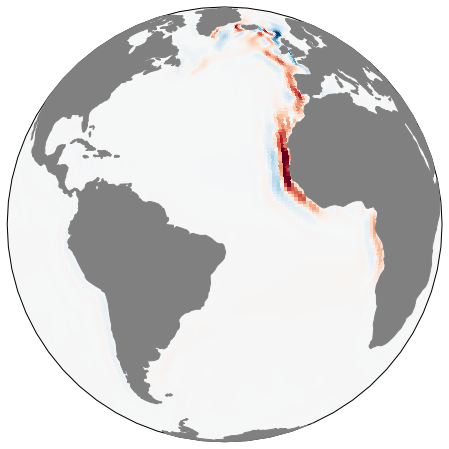

In [24]:
fig,ax = plt.subplots(1,1,figsize=(8,8),subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35)})

ax.pcolormesh(lons,lats,lldata,cmap='RdBu_r',vmin=-vmax,vmax=vmax,
              transform=ccrs.PlateCarree(central_longitude=0))
ax.add_feature(cf.LAND,zorder=3,color='gray')

In [29]:
xlons = xr.DataArray(lons[0,:],coords={'lon':lons[0,:]},dims=('lon',),
                     name='lon',attrs={'units':'Degrees East','full_name':'longitude'})

In [32]:
xlats = xr.DataArray(lats[:,0],coords={'lat':lats[:,0]},dims=('lat',),
                     name='lat',attrs={'units':'Degrees North','full_name':'latitude'})

In [33]:
ll = xr.Dataset()

In [37]:
ll['lon'] = xlons
ll['lat'] = xlats
ll['adxx_tauv_heatISR'] = xr.DataArray(llheatisr,coords={'lat':ll.lat,'lon':ll.lon},dims=('lat','lon'))
ll['adxx_tauv_subIrm'] = xr.DataArray(llsubirm,coords={'lat':ll.lat,'lon':ll.lon},dims=('lat','lon'))

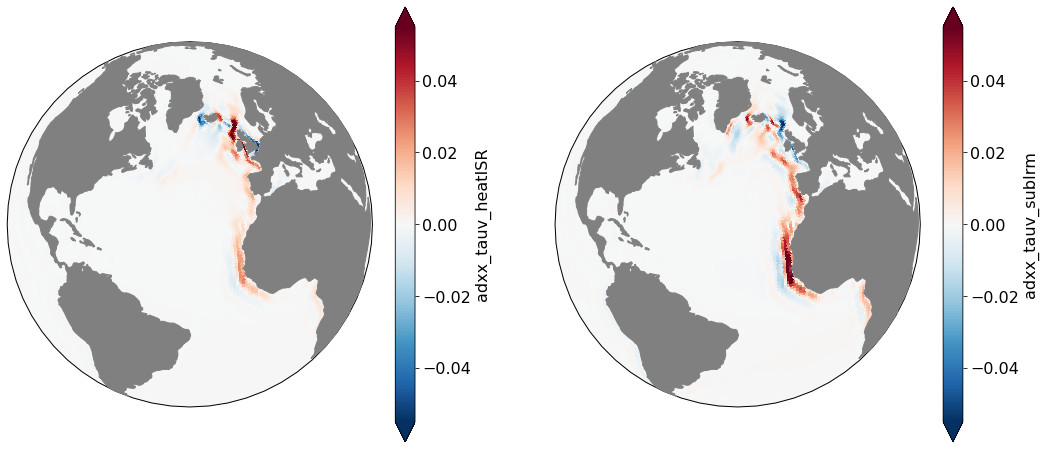

In [43]:
fig,axs = plt.subplots(1,2,figsize=(18,8),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})

ll.adxx_tauv_heatISR.plot(vmin=-vmax,vmax=vmax,cmap='RdBu_r',transform=ccrs.PlateCarree(central_longitude=0),ax=axs[0])

ll.adxx_tauv_subIrm.plot(vmin=-vmax,vmax=vmax,cmap='RdBu_r',transform=ccrs.PlateCarree(central_longitude=0),ax=axs[1])
[ax.add_feature(cf.LAND,zorder=3,color='gray') for ax in axs]

In [45]:
ll.to_netcdf('~/jupyter-notebooks/datasets/noras_story_latlon.nc')